In [4]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [5]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [6]:
NUM_CLASSES = 50

# Dataset reading

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │           550 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,620 (6.33 KB)

 Trainable params: 1,620 (6.33 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping   
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
252/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0504 - loss: 3.7351
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0508 - loss: 3.7320 - val_accuracy: 0.1793 - val_loss: 2.8581
Epoch 2/1000
241/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1567 - loss: 2.8502
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1583 - loss: 2.8426 - val_accuracy: 0.3386 - val_loss: 2.1828
Epoch 3/1000
233/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2613 - loss: 2.3801
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2626 - loss: 2.3746 - val_accuracy: 0.4950 - val_loss: 1.8044
Epoch 4/1000
229/254 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3179 - loss: 2.1422
Epoch 4: saving model to model/keypoint_classifier/keypoint_classi

In [15]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8327 - loss: 0.5765  


In [16]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [17]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[4.5197135e-01 4.1106567e-01 1.2023116e-01 1.8531010e-12 1.1522758e-37
 4.3371208e-05 9.8040928e-27 0.0000000e+00 5.9999313e-37 0.0000000e+00
 7.2183373e-20 1.9241405e-23 8.5925590e-17 0.0000000e+00 1.4177837e-36
 3.7973200e-25 3.1618608e-23 5.0241908e-09 2.0691904e-30 2.8008383e-14
 7.6174367e-32 1.0062923e-27 6.7339994e-22 6.0219829e-32 5.4505122e-06
 3.6609938e-06 0.0000000e+00 5.2164058e-05 3.6144130e-33 1.4307006e-25
 1.7908361e-16 7.2310912e-29 7.1184441e-28 8.3542085e-07 1.2003691e-21
 1.6198281e-12 1.2628770e-11 6.2779785e-36 1.7509578e-08 1.3945383e-03
 2.8108917e-35 9.0385517e-03 5.3947270e-03 2.0902995e-09 7.9854246e-04
 7.9258109e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
0


# Confusion matrix

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step


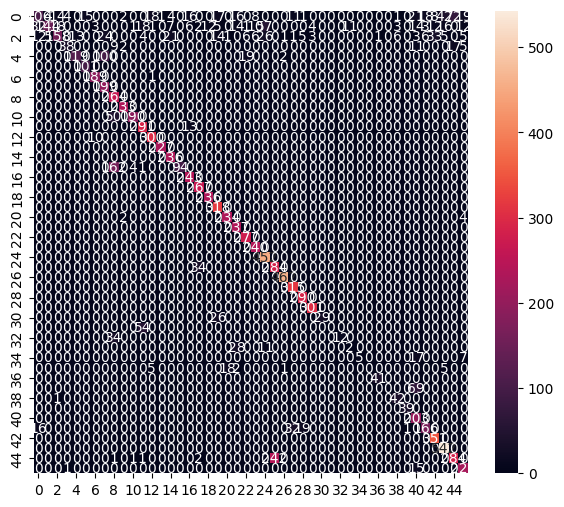

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.25      0.36       418
           1       0.94      0.35      0.52       406
           2       0.83      0.44      0.57       359
           3       0.88      0.46      0.61        82
           4       0.90      0.50      0.64       240
           5       0.87      1.00      0.93       101
           6       0.94      0.99      0.96       190
           7       0.62      1.00      0.76       199
           8       0.51      1.00      0.67       264
           9       0.97      1.00      0.99       233
          10       0.97      0.79      0.87       240
          11       0.79      0.96      0.86       304
          12       0.92      0.97      0.94       310
          13       1.00      1.00      1.00       227
          14       0.88      1.00      0.94       236
          15       1.00      0.36      0.53       261
          16       0.87      1.00      0.93       243
     

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [19]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [20]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpfh1wvpzu\assets


INFO:tensorflow:Assets written to: C:\Users\asus\AppData\Local\Temp\tmpfh1wvpzu\assets


Saved artifact at 'C:\Users\asus\AppData\Local\Temp\tmpfh1wvpzu'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 50), dtype=tf.float32, name=None)
Captures:
  2245954734032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2245954737872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2245954738064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2245954743440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2245954738832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2245990717136: TensorSpec(shape=(), dtype=tf.resource, name=None)


8580

# Inference test

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [22]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.51971620e-01 4.11065131e-01 1.20231345e-01 1.85310209e-12
 1.15226755e-37 4.33712739e-05 9.80405963e-27 0.00000000e+00
 5.99997932e-37 0.00000000e+00 7.21833992e-20 1.92414866e-23
 8.59256228e-17 0.00000000e+00 1.41778428e-36 3.79732199e-25
 3.16187441e-23 5.02419351e-09 2.06920710e-30 2.80085047e-14
 7.61738148e-32 1.00629281e-27 6.73400244e-22 6.02203111e-32
 5.45051489e-06 3.66099221e-06 0.00000000e+00 5.21641850e-05
 3.61444199e-33 1.43070119e-25 1.79084391e-16 7.23109416e-29
 7.11847445e-28 8.35420451e-07 1.20037417e-21 1.61982277e-12
 1.26288008e-11 6.27802877e-36 1.75096204e-08 1.39454170e-03
 2.81089254e-35 9.03857406e-03 5.39473537e-03 2.09030038e-09
 7.98543741e-04 7.92581410e-24 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
0
